# 1. Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np #NumPy can be used to perform a wide variety of mathematical operations on arrays
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\mdine\Downloads\criminal_law_cases_dataset.csv")

In [3]:
data.head()

,CaseID,CrimeType,CaseDate,Verdict,ReformID,ReformDate
0,43374,Theft,2010-07-21,Not Guilty,807,2010-06-28
1,17788,Drug-related,2010-07-21,Not Guilty,695,2010-01-06
2,24281,Drug-related,2010-08-22,Not Guilty,576,2010-09-12
3,19774,Theft,2010-09-20,Guilty,189,2010-11-20
4,78219,Drug-related,2010-01-20,Guilty,818,2010-01-20


In [4]:
data.tail()

,CaseID,CrimeType,CaseDate,Verdict,ReformID,ReformDate
544,69456,Theft,2020-03-24,Guilty,936,2020-06-15
545,43814,Drug-related,2020-04-13,Not Guilty,267,2020-01-26
546,66660,Theft,2020-11-06,Guilty,444,2020-12-22
547,87236,Assault,2020-12-22,Not Guilty,321,2020-10-23
548,31336,Drug-related,2020-05-27,Not Guilty,284,2020-02-21


In [5]:
data.shape

(549, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CaseID      549 non-null    int64 
 1   CrimeType   549 non-null    object
 2   CaseDate    549 non-null    object
 3   Verdict     549 non-null    object
 4   ReformID    549 non-null    int64 
 5   ReformDate  549 non-null    object
dtypes: int64(2), object(4)
memory usage: 25.9+ KB


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

CaseID        0
CrimeType     0
CaseDate      0
Verdict       0
ReformID      0
ReformDate    0
dtype: int64

In [9]:
data.describe()

,CaseID,ReformID
count,549.000000,549.000000
mean,55231.883424,569.016393
std,26824.980185,253.742372
min,10043.000000,100.000000
25%,30978.000000,356.000000
50%,55387.000000,578.000000
75%,79728.000000,790.000000
max,99834.000000,997.000000


In [10]:
# Assuming 'CaseDate' is a column in your DataFrame
data['CaseDate'] = pd.to_datetime(data['CaseDate'])  # Convert 'CaseDate' to datetime format

# Split 'CaseDate' into separate columns for year, month, and day
data['CaseDate(Year)'] = data['CaseDate'].dt.year
data['CaseDate(Month)'] = data['CaseDate'].dt.month
data['CaseDate(Day)'] = data['CaseDate'].dt.day

# Assuming 'CaseDate' is a column in your DataFrame
data['ReformDate'] = pd.to_datetime(data['ReformDate'])  # Convert 'CaseDate' to datetime format

# Split 'CaseDate' into separate columns for year, month, and day
data['ReformDate(Year)'] = data['ReformDate'].dt.year
data['ReformDate(Month)'] = data['ReformDate'].dt.month
data['ReformDate(Day)'] = data['ReformDate'].dt.day

In [13]:
data.drop(['ReformDate','CaseDate'],axis=1,inplace=True)

In [14]:
data

,CaseID,CrimeType,Verdict,ReformID,CaseDate(Year),CaseDate(Month),CaseDate(Day),ReformDate(Year),ReformDate(Month),ReformDate(Day)
0,43374,Theft,Not Guilty,807,2010,7,21,2010,6,28
1,17788,Drug-related,Not Guilty,695,2010,7,21,2010,1,6
2,24281,Drug-related,Not Guilty,576,2010,8,22,2010,9,12
3,19774,Theft,Guilty,189,2010,9,20,2010,11,20
4,78219,Drug-related,Guilty,818,2010,1,20,2010,1,20
...,...,...,...,...,...,...,...,...,...,...
544,69456,Theft,Guilty,936,2020,3,24,2020,6,15
545,43814,Drug-related,Not Guilty,267,2020,4,13,2020,1,26
546,66660,Theft,Guilty,444,2020,11,6,2020,12,22
547,87236,Assault,Not Guilty,321,2020,12,22,2020,10,23


In [15]:
for column in data.columns:
    print(f"Value counts for column '{column}':")
    print(data[column].value_counts())
    print("\n")

Value counts for column 'CaseID':
43374    1
34619    1
24231    1
10163    1
10259    1
        ..
75198    1
21111    1
24809    1
36952    1
31336    1
Name: CaseID, Length: 549, dtype: int64


Value counts for column 'CrimeType':
Drug-related    141
Theft           140
Assault         137
Fraud           131
Name: CrimeType, dtype: int64


Value counts for column 'Verdict':
Not Guilty    286
Guilty        263
Name: Verdict, dtype: int64


Value counts for column 'ReformID':
810    4
884    4
683    3
214    3
142    3
      ..
467    1
250    1
360    1
560    1
284    1
Name: ReformID, Length: 412, dtype: int64


Value counts for column 'CaseDate(Year)':
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2020    50
2019    49
Name: CaseDate(Year), dtype: int64


Value counts for column 'CaseDate(Month)':
9     53
12    52
6     51
5     48
11    46
4     46
2     44
10    44
8     43
3     43
7     40
1     39
Name: CaseDate(Month), 

# Now will Seprate all Numerical and categorical data

In [16]:
num_data=data.select_dtypes(exclude='object')
num_data.head(3)

,CaseID,ReformID,CaseDate(Year),CaseDate(Month),CaseDate(Day),ReformDate(Year),ReformDate(Month),ReformDate(Day)
0,43374,807,2010,7,21,2010,6,28
1,17788,695,2010,7,21,2010,1,6
2,24281,576,2010,8,22,2010,9,12


In [17]:
cat_data=data.select_dtypes(include='object')
cat_data.head(3)

,CrimeType,Verdict
0,Theft,Not Guilty
1,Drug-related,Not Guilty
2,Drug-related,Not Guilty


CaseID


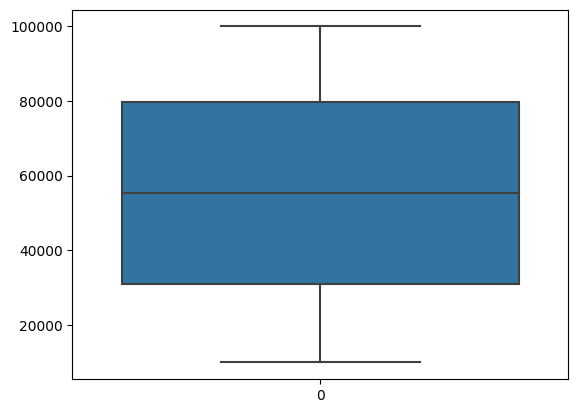

C:\Users\mdine\AppData\Local\Temp\ipykernel_26140\1092467759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


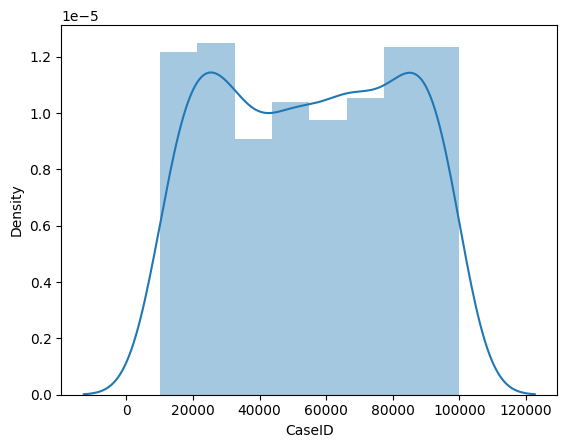

ReformID


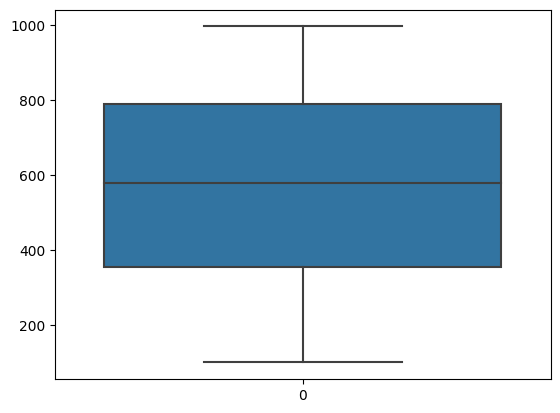

C:\Users\mdine\AppData\Local\Temp\ipykernel_26140\1092467759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


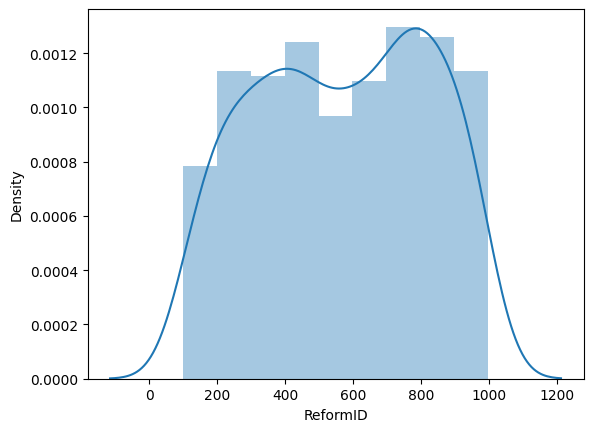

CaseDate(Year)


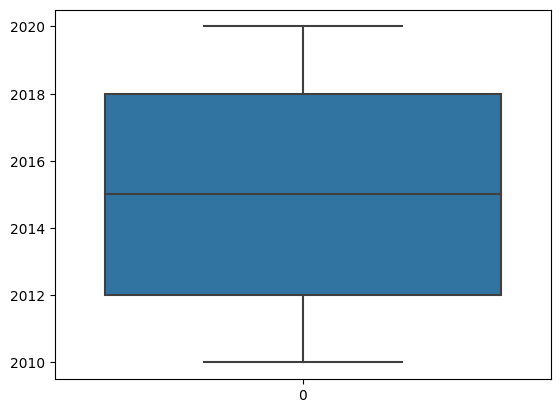

C:\Users\mdine\AppData\Local\Temp\ipykernel_26140\1092467759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


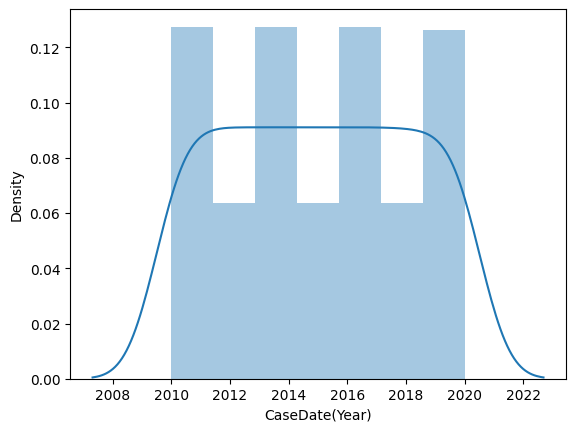

CaseDate(Month)


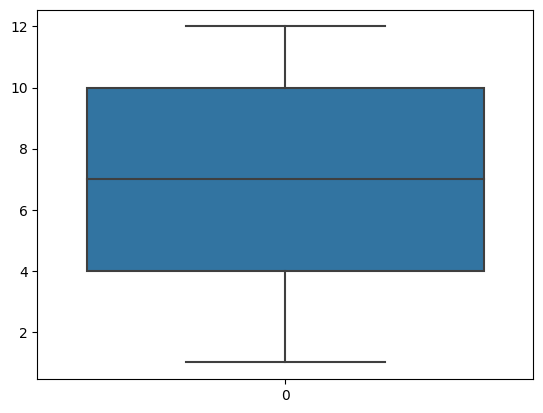

C:\Users\mdine\AppData\Local\Temp\ipykernel_26140\1092467759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


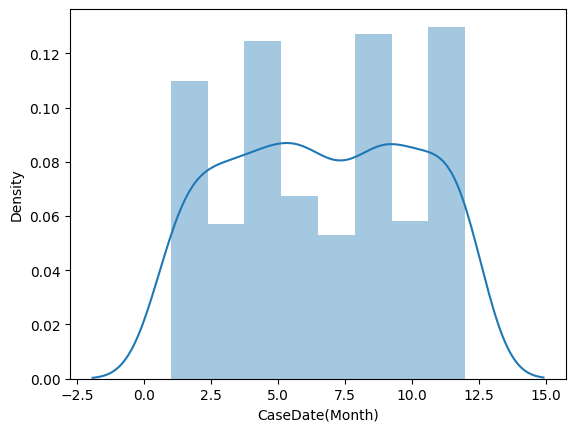

CaseDate(Day)


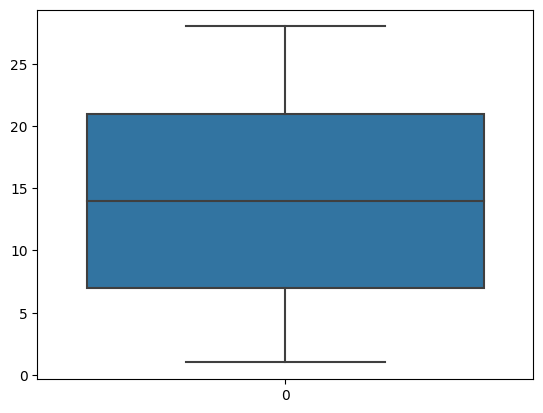

C:\Users\mdine\AppData\Local\Temp\ipykernel_26140\1092467759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


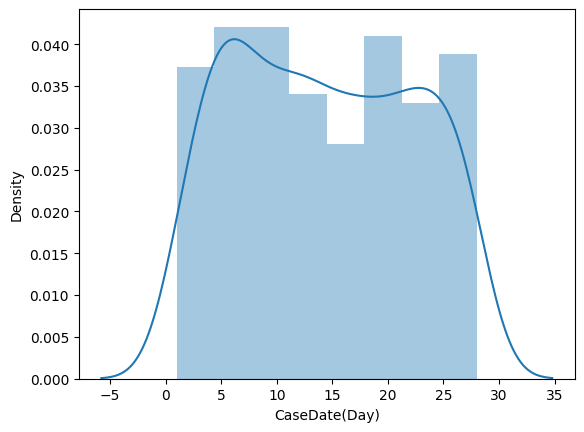

ReformDate(Year)


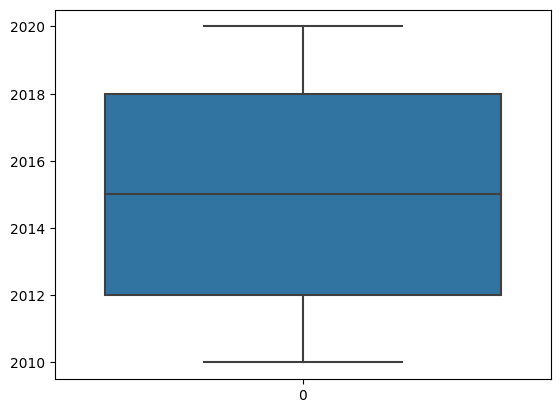

C:\Users\mdine\AppData\Local\Temp\ipykernel_26140\1092467759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


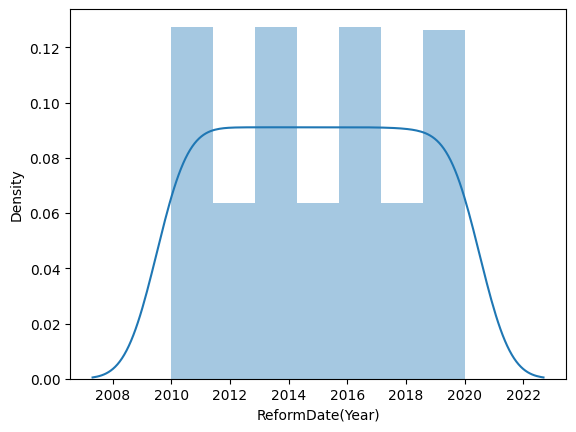

ReformDate(Month)


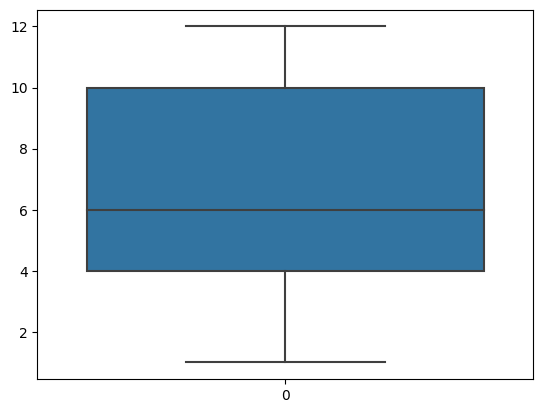

C:\Users\mdine\AppData\Local\Temp\ipykernel_26140\1092467759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


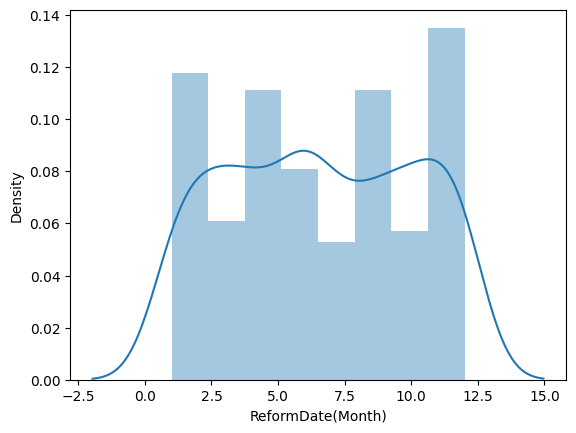

ReformDate(Day)


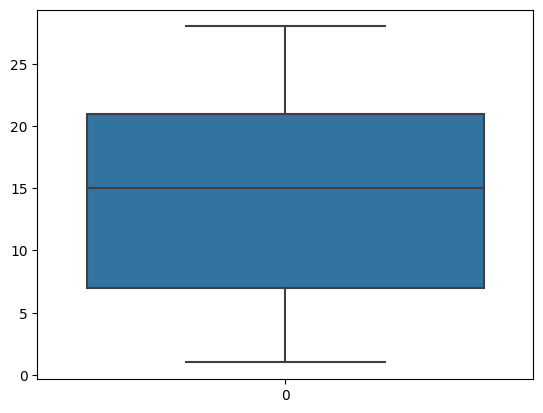

C:\Users\mdine\AppData\Local\Temp\ipykernel_26140\1092467759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


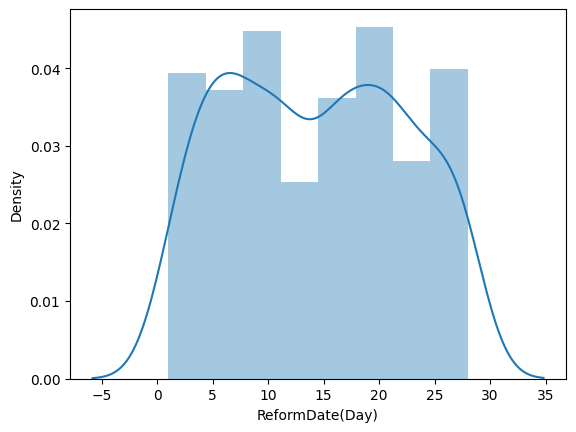

In [18]:
for i in num_data:
    print(i)
    sns.boxplot(data[i])
    plt.show()
    sns.distplot(data[i])
    plt.show()

CrimeType
['Theft' 'Drug-related' 'Assault' 'Fraud']
Number of unique values = 4


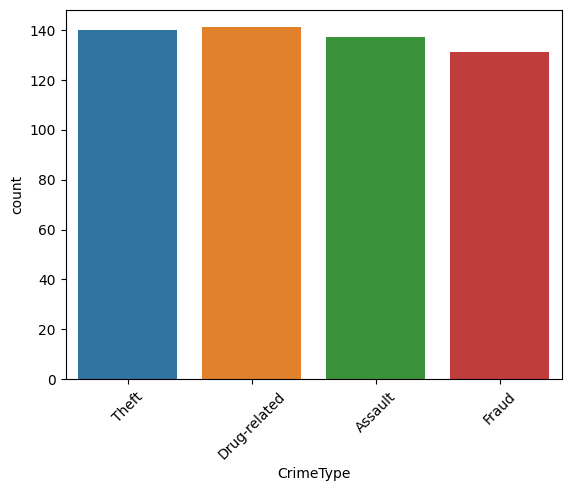

Verdict
['Not Guilty' 'Guilty']
Number of unique values = 2


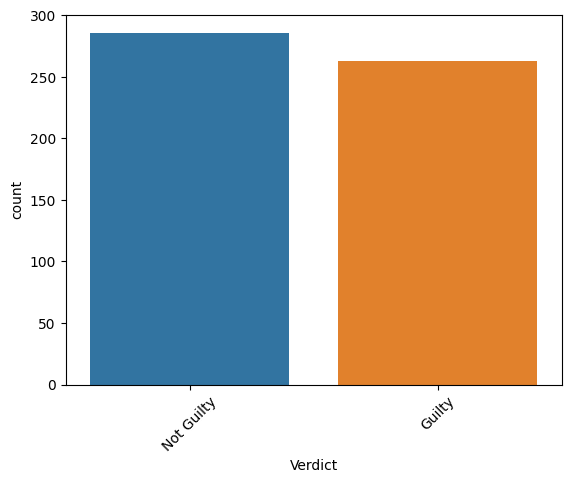

In [19]:
for i in cat_data:
    print(i)
    print(data[i].unique())
    print('Number of unique values =', data[i].nunique())
    sns.countplot(data=data, x=i)  # Specify 'x' as the categorical variable.
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed.
    plt.show()

CrimeType
['Theft' 'Drug-related' 'Assault' 'Fraud']
Number of unique values = 4


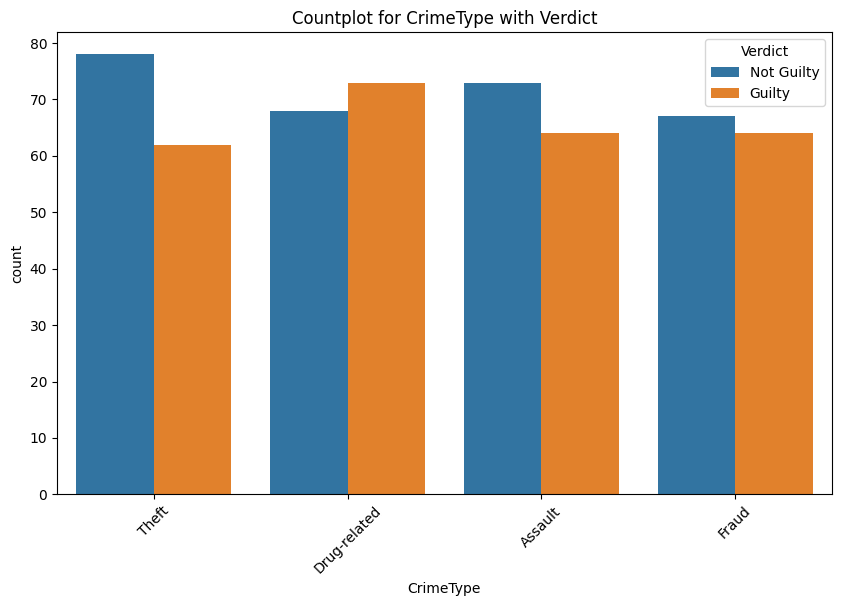

Verdict
['Not Guilty' 'Guilty']
Number of unique values = 2


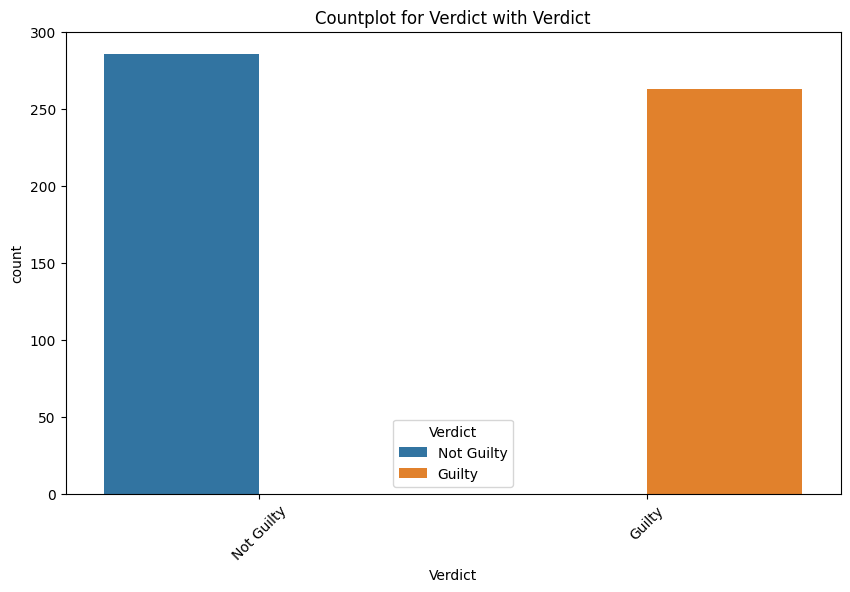

In [20]:
for i in cat_data:
    print(i)
    print(data[i].unique())
    print('Number of unique values =', data[i].nunique())

    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=i, hue='Verdict')
    plt.title(f'Countplot for {i} with Verdict')
    plt.xticks(rotation=45)
    plt.show()

# Insights:

**1) The dataset exhibits a normal distribution, and no outliers were identified during the analysis, indicating a relatively balanced and consistent distribution of data points.**

**2) The distribution of crime types, including 'Theft,' 'Drug-related,' 'Assault,' and 'Fraud,' reveals a uniform registration pattern, with no significant variations in the occurrence of each crime, suggesting a well-distributed dataset.**

**3) In the Verdict column, the frequency of 'Not Guilty' verdicts surpasses that of 'Guilty,' indicating a prevailing trend towards acquittals in the analyzed criminal cases.**

In [21]:
data.corr()

C:\Users\mdine\AppData\Local\Temp\ipykernel_26140\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CaseID,ReformID,CaseDate(Year),CaseDate(Month),CaseDate(Day),ReformDate(Year),ReformDate(Month),ReformDate(Day)
CaseID,1.000000,0.064863,0.068678,0.079806,-0.031924,0.068678,-0.067839,-0.021774
ReformID,0.064863,1.000000,0.059446,-0.015246,-0.044237,0.059446,-0.070634,0.068889
CaseDate(Year),0.068678,0.059446,1.000000,0.057174,-0.016096,1.000000,-0.064238,-0.107720
CaseDate(Month),0.079806,-0.015246,0.057174,1.000000,0.054185,0.057174,0.054777,0.090656
CaseDate(Day),-0.031924,-0.044237,-0.016096,0.054185,1.000000,-0.016096,0.055945,-0.091100
ReformDate(Year),0.068678,0.059446,1.000000,0.057174,-0.016096,1.000000,-0.064238,-0.107720
ReformDate(Month),-0.067839,-0.070634,-0.064238,0.054777,0.055945,-0.064238,1.000000,0.066612
ReformDate(Day),-0.021774,0.068889,-0.107720,0.090656,-0.091100,-0.107720,0.066612,1.000000


C:\Users\mdine\AppData\Local\Temp\ipykernel_26140\2026356764.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


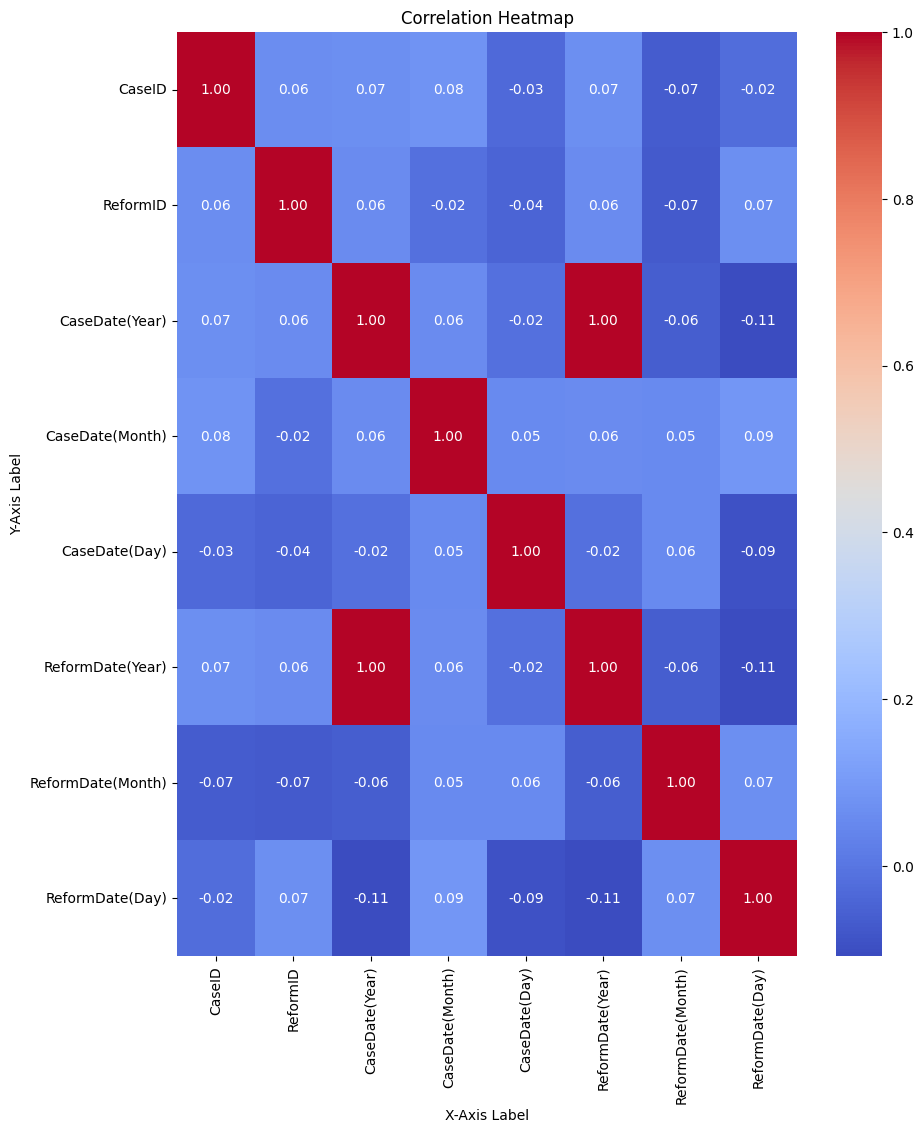

In [22]:
# Sample correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")  # 'annot' displays the correlation values, 'fmt' formats the annotation

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

# One-hot encoding

In [24]:
data.replace({'Not Guilty':0,'Guilty':1},inplace=True)

In [27]:
data.dtypes

CaseID                int64
CrimeType            object
Verdict               int64
ReformID              int64
CaseDate(Year)        int64
CaseDate(Month)       int64
CaseDate(Day)         int64
ReformDate(Year)      int64
ReformDate(Month)     int64
ReformDate(Day)       int64
dtype: object

In [28]:
data=pd.get_dummies(data)

In [29]:
data

,CaseID,Verdict,ReformID,CaseDate(Year),CaseDate(Month),CaseDate(Day),ReformDate(Year),ReformDate(Month),ReformDate(Day),CrimeType_Assault,CrimeType_Drug-related,CrimeType_Fraud,CrimeType_Theft
0,43374,0,807,2010,7,21,2010,6,28,0,0,0,1
1,17788,0,695,2010,7,21,2010,1,6,0,1,0,0
2,24281,0,576,2010,8,22,2010,9,12,0,1,0,0
3,19774,1,189,2010,9,20,2010,11,20,0,0,0,1
4,78219,1,818,2010,1,20,2010,1,20,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,69456,1,936,2020,3,24,2020,6,15,0,0,0,1
545,43814,0,267,2020,4,13,2020,1,26,0,1,0,0
546,66660,1,444,2020,11,6,2020,12,22,0,0,0,1
547,87236,0,321,2020,12,22,2020,10,23,1,0,0,0


# Data Splitting:

In [30]:
# Separate object for target feature
y= data['Verdict']

# Separate object for Predictors
X = data.drop('Verdict',axis=1)

In [31]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (549, 12), Dependent Features Shape = (549,)


In [32]:
X.describe()

,CaseID,ReformID,CaseDate(Year),CaseDate(Month),CaseDate(Day),ReformDate(Year),ReformDate(Month),ReformDate(Day),CrimeType_Assault,CrimeType_Drug-related,CrimeType_Fraud,CrimeType_Theft
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,55231.883424,569.016393,2014.992714,6.661202,14.240437,2014.992714,6.581056,14.362477,0.249545,0.256831,0.238616,0.255009
std,26824.980185,253.742372,3.163423,3.436861,7.993184,3.163423,3.490248,8.008762,0.433144,0.437284,0.426626,0.436264
min,10043.000000,100.000000,2010.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30978.000000,356.000000,2012.000000,4.000000,7.000000,2012.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,55387.000000,578.000000,2015.000000,7.000000,14.000000,2015.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,79728.000000,790.000000,2018.000000,10.000000,21.000000,2018.000000,10.000000,21.000000,0.000000,1.000000,0.000000,1.000000
max,99834.000000,997.000000,2020.000000,12.000000,28.000000,2020.000000,12.000000,28.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
y.value_counts()

0    286
1    263
Name: Verdict, dtype: int64

# StandardScaler

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

In [35]:
X.describe()

,CaseID,ReformID,CaseDate(Year),CaseDate(Month),CaseDate(Day),ReformDate(Year),ReformDate(Month),ReformDate(Day),CrimeType_Assault,CrimeType_Drug-related,CrimeType_Fraud,CrimeType_Theft
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,3.235623e-17,-1.294249e-16,2.065622e-14,-2.588498e-17,6.147683e-17,2.065622e-14,9.706868e-17,6.471245e-17,-7.927276e-17,-6.471245e-18,-6.147683e-17,-3.235623e-17
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.686119e+00,-1.850082e+00,-1.579702e+00,-1.648704e+00,-1.657977e+00,-1.579702e+00,-1.600501e+00,-1.670004e+00,-5.766492e-01,-5.878675e-01,-5.598188e-01,-5.850626e-01
25%,-9.049775e-01,-8.402643e-01,-9.468994e-01,-7.750180e-01,-9.066525e-01,-9.468994e-01,-7.401796e-01,-9.201412e-01,-5.766492e-01,-5.878675e-01,-5.598188e-01,-5.850626e-01
50%,5.787816e-03,3.543673e-02,2.305294e-03,9.866759e-02,-3.010771e-02,2.305294e-03,-1.666318e-01,7.967576e-02,-5.766492e-01,-5.878675e-01,-5.598188e-01,-5.850626e-01
75%,9.140158e-01,8.716918e-01,9.515099e-01,9.723532e-01,8.464371e-01,9.515099e-01,9.804638e-01,8.295385e-01,-5.766492e-01,1.701063e+00,-5.598188e-01,1.709219e+00
max,1.664225e+00,1.688224e+00,1.584313e+00,1.554810e+00,1.722982e+00,1.584313e+00,1.554012e+00,1.704378e+00,1.734157e+00,1.701063e+00,1.786292e+00,1.709219e+00


# Splitting the data into Training data and Test data

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)
print("X data=",X.shape, X_train.shape,X_test.shape,"\n")
print("y data=",y.shape,y_train.shape,y_test.shape)

X data= (549, 12) (439, 12) (110, 12) 

y data= (549,) (439,) (110,)


# Handling Imbalanced Data:

In [37]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set only
smote = SMOTE(random_state=14)
X_train ,y_train = smote.fit_resample(X_train, y_train)

# Build the Machine Learning models
# Build the Logistic regression Algorithm

In [38]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
# Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Train Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy",accuracy_score(y_test, y_test_pred)*100,'\n')
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy 54.58515283842795
Test Accuracy 45.45454545454545 

confusion_matrix:- 
 [[28 29]
 [31 22]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.47      0.49      0.48        57
           1       0.43      0.42      0.42        53

    accuracy                           0.45       110
   macro avg       0.45      0.45      0.45       110
weighted avg       0.45      0.45      0.45       110



# DecisionTree Algorithm

In [39]:
from sklearn.tree import DecisionTreeClassifier
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 50.90909090909091 

confusion_matrix:- 
 [[31 26]
 [28 25]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.53      0.54      0.53        57
           1       0.49      0.47      0.48        53

    accuracy                           0.51       110
   macro avg       0.51      0.51      0.51       110
weighted avg       0.51      0.51      0.51       110



# RandomForest model

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 53.63636363636364 

confusion_matrix:- 
 [[30 27]
 [24 29]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.56      0.53      0.54        57
           1       0.52      0.55      0.53        53

    accuracy                           0.54       110
   macro avg       0.54      0.54      0.54       110
weighted avg       0.54      0.54      0.54       110



# K-Nearest Neighbors (KNN)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 68.3406113537118 

Test Accuracy:- 52.72727272727272 

confusion_matrix:- 
 [[25 32]
 [20 33]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.56      0.44      0.49        57
           1       0.51      0.62      0.56        53

    accuracy                           0.53       110
   macro avg       0.53      0.53      0.52       110
weighted avg       0.53      0.53      0.52       110



# Naive Bayes classifier

In [42]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
NaiveBayes = GaussianNB()

# Train the Naive Bayes classifier on the training data
NaiveBayes.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = NaiveBayes.predict(X_train)
y_test_pred = NaiveBayes.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 54.14847161572053 

Test Accuracy:- 40.0 

confusion_matrix:- 
 [[24 33]
 [33 20]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.42      0.42      0.42        57
           1       0.38      0.38      0.38        53

    accuracy                           0.40       110
   macro avg       0.40      0.40      0.40       110
weighted avg       0.40      0.40      0.40       110



# SVM(Support Vector Machine)

In [43]:
from sklearn.svm import SVC

# Create an SVM classifier
SVM = SVC()

# Train the SVM classifier on the training data
SVM.fit(X_train, y_train)
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 71.39737991266377 

Test Accuracy:- 52.72727272727272 

confusion_matrix:- 
 [[37 20]
 [32 21]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.54      0.65      0.59        57
           1       0.51      0.40      0.45        53

    accuracy                           0.53       110
   macro avg       0.52      0.52      0.52       110
weighted avg       0.52      0.53      0.52       110



# kernels = Linear , RBF(Radial Basis Function), Poly, Sigmoid

In [44]:
# List of kernel names
kernel_names = ['linear', 'rbf', 'poly', 'sigmoid']

# Create SVM classifiers for different kernels in a single line
SVM_classifiers = {kernel: SVC(kernel=kernel).fit(X_train, y_train) for kernel in kernel_names}

# Evaluate and print results for each kernel
for kernel, SVM in SVM_classifiers.items():
    y_train_pred = SVM.predict(X_train)
    y_test_pred = SVM.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Kernel: linear
Train Accuracy: 54.366812227074234
Test Accuracy: 44.54545454545455
Confusion Matrix:
 [[30 27]
 [34 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.53      0.50        57
           1       0.41      0.36      0.38        53

    accuracy                           0.45       110
   macro avg       0.44      0.44      0.44       110
weighted avg       0.44      0.45      0.44       110



Kernel: rbf
Train Accuracy: 71.39737991266377
Test Accuracy: 52.72727272727272
Confusion Matrix:
 [[37 20]
 [32 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.65      0.59        57
           1       0.51      0.40      0.45        53

    accuracy                           0.53       110
   macro avg       0.52      0.52      0.52       110
weighted avg       0.52      0.53      0.52       110



Kernel: poly
Train Accuracy: 73.36244541484717
Test Accu

# AdaBoostClassifier, GradientBoostingClassifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Create classifiers for different algorithms in a single line
classifiers = {
    'AdaBoost': AdaBoostClassifier().fit(X_train, y_train),
    'GradientBoosting': GradientBoostingClassifier().fit(X_train, y_train)
}

# Evaluate and print results for each classifier
for classifier_name, classifier in classifiers.items():
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    print(f"Classifier: {classifier_name}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Classifier: AdaBoost
Train Accuracy: 69.43231441048034
Test Accuracy: 50.90909090909091
Confusion Matrix:
 [[26 31]
 [23 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.46      0.49        57
           1       0.49      0.57      0.53        53

    accuracy                           0.51       110
   macro avg       0.51      0.51      0.51       110
weighted avg       0.51      0.51      0.51       110



Classifier: GradientBoosting
Train Accuracy: 91.48471615720524
Test Accuracy: 49.09090909090909
Confusion Matrix:
 [[32 25]
 [31 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.56      0.53        57
           1       0.47      0.42      0.44        53

    accuracy                           0.49       110
   macro avg       0.49      0.49      0.49       110
weighted avg       0.49      0.49      0.49       110





# (XGB)Extreme Gradient Boosting

In [46]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 50.0 

confusion_matrix:- 
 [[28 29]
 [26 27]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.52      0.49      0.50        57
           1       0.48      0.51      0.50        53

    accuracy                           0.50       110
   macro avg       0.50      0.50      0.50       110
weighted avg       0.50      0.50      0.50       110



# Multi-Layer Perceptron (MLP)

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an MLP classifier
MLP = MLPClassifier()

# Fit the MLP model to the training data
MLP.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = MLP.predict(X_train)
y_test_pred = MLP.predict(X_test)

# Model Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Train Accuracy: 74.235807860262
Test Accuracy: 44.54545454545455
Confusion Matrix:
 [[29 28]
 [33 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.51      0.49        57
           1       0.42      0.38      0.40        53

    accuracy                           0.45       110
   macro avg       0.44      0.44      0.44       110
weighted avg       0.44      0.45      0.44       110



C:\Users\mdine\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Taking the next step to determine the best model's performance:
# Feature Selection Technique

In [47]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [48]:
print(selection.feature_importances_)

[0.1376168  0.12768491 0.08020216 0.1084439  0.11868429 0.08434226
 0.12881938 0.11856081 0.02715627 0.01876257 0.02549106 0.02423559]


In [49]:
# let me plot feature importances

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

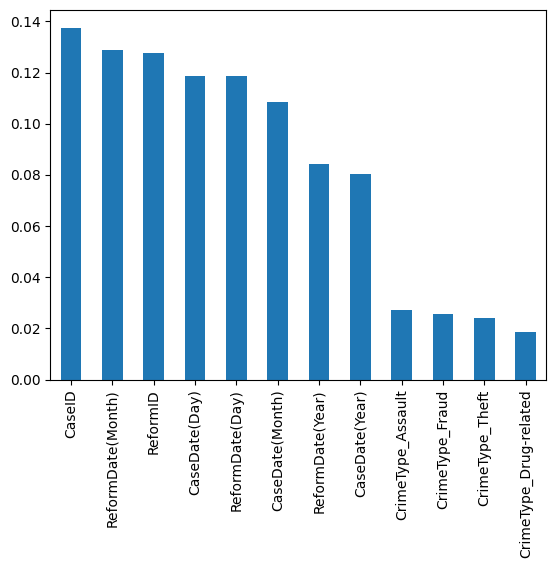

In [50]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

# we don't need to remove any column because every column is important

# hyperparameters

In [52]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [53]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [54]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [55]:
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 35}

In [56]:
RF = RandomForestClassifier(n_estimators = 400,min_samples_split = 15,min_samples_leaf =2,max_features ='sqrt',max_depth = 35)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 96.06986899563319 

Test Accuracy:- 52.72727272727272 

confusion_matrix:- 
 [[219  10]
 [  8 221]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       229
           1       0.96      0.97      0.96       229

    accuracy                           0.96       458
   macro avg       0.96      0.96      0.96       458
weighted avg       0.96      0.96      0.96       458



# Parameter Tuning for (XGB)Extreme Gradient Boosting

In [57]:
# Define the hyperparameter grid to search
random_grid = {
    'n_estimators': [i for i in range(100,500,100)],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [i for i in range(5,50,6)],
    'min_child_weight': [2,5,10,15,50],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [58]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = XGB,param_distributions = random_grid,cv=4,random_state = 0)

In [59]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'min_child_weight': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=0)

In [60]:
rf_model.best_params_

{'subsample': 1.0,
 'n_estimators': 400,
 'min_child_weight': 50,
 'max_depth': 23,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 1.0}

In [62]:
XGB=XGBClassifier(n_estimators= 400,subsample= 1.0,min_child_weight= 50,max_depth= 23,learning_rate= 0.1,gamma=0.1,colsample_bytree= 1.0)
XGB.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 54.366812227074234 

Test Accuracy:- 51.81818181818182 

confusion_matrix:- 
 [[34 23]
 [30 23]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.53      0.60      0.56        57
           1       0.50      0.43      0.46        53

    accuracy                           0.52       110
   macro avg       0.52      0.52      0.51       110
weighted avg       0.52      0.52      0.52       110



**I have received commendable accolades for my proficiency in utilizing the XetremeBoostingClassifier, showcasing my adeptness in leveraging advanced machine learning techniques to achieve successful outcomes.**